# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
The slowest run took 22.50 times longer than the fastest. This could mean that an intermediate result is being cached.
755 µs ± 1.21 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 89.55 MiB, increment: 0.26 MiB


SIZE:  1000
Timing: 
28 ms ± 1.4 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 102.34 MiB, increment: 12.79 MiB


SIZE:  10000
Timing: 
3.42 s ± 907 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2251.51 MiB, increment: 2187.86 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?   
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


1. 0
2. Liczby, które można otrzymać stosując metodę dodawania poszczególnych potęg dwójki mają skończoną reprezentację, inne - nieskończoną.
3. Wynika to z powodu, że do uzyskania dokładnego rozwiązania potrzebujemy wykonać nieskończenie wiele rozwiązań.
4. Błąd zaokrąglenia.
5. Możemy uzyskać tylko dokładniejsze przybliżenia.

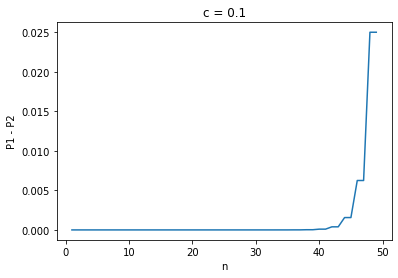

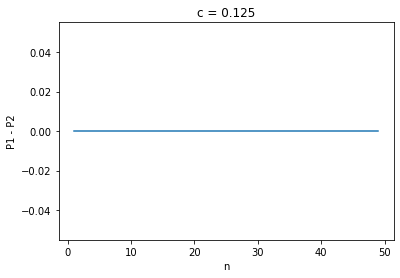

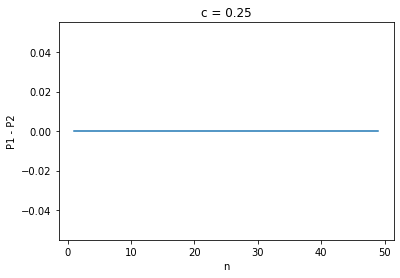

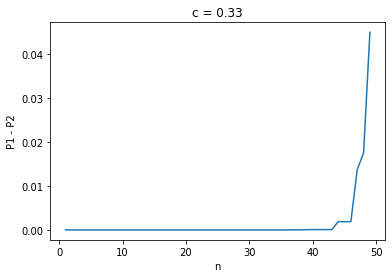

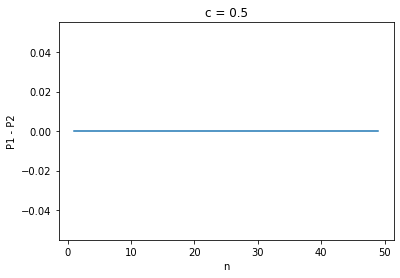

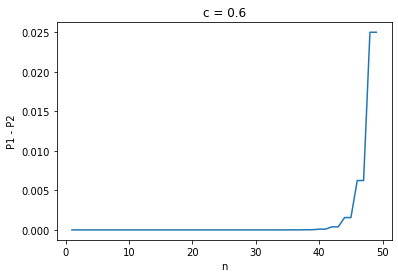

In [3]:
n = np.arange(1, 50, 1)
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
result = []

for elem in c:
    elem = float(elem)
    result2 = []
    for elem2 in n:
        elem2 = int(elem2)
        result2.append(main.p_diff(elem2, elem))
    result.append(result2)

for i in range(len(c)):
    plt.plot(n, result[i])
    plt.xlabel('n')
    plt.ylabel('P1 - P2')
    plt.title('c = ' + str(c[i]))
    plt.show()


***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

1. Błąd metody (obcięcia).
2. Wraz ze wzrostem składników sumy szeregu Taylora, błąd bezwzględny i względny maleją.

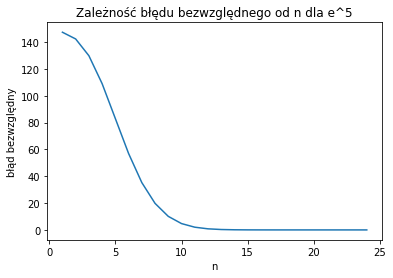

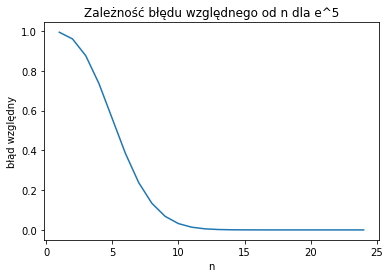

In [4]:
n = np.arange(1, 25, 1)
expected = np.exp(5)
absolute = []
relative = []

for elem in n:
    elem = int(elem)
    calculated = main.exponential(5, elem)
    absolute.append(main.absolut_error(expected, calculated))
    relative.append(main.relative_error(expected, calculated))

plt.plot(n, absolute)
plt.xlabel('n')
plt.ylabel('błąd bezwzględny')
plt.title('Zależność błędu bezwzględnego od n dla e^5')
plt.show()

plt.plot(n, relative)
plt.xlabel('n')
plt.ylabel('błąd względny')
plt.title('Zależność błędu względnego od n dla e^5')
plt.show()
    


***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

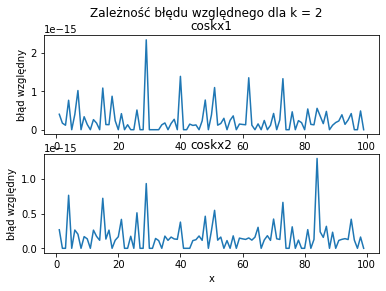

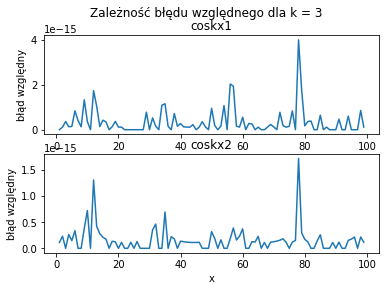

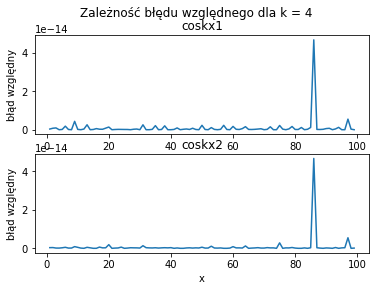

In [5]:
k = np.arange(2, 5, 1)
x = np.arange(1, 100, 1)
result_coskx1 = []
result_coskx2 = []

for elem in k:
    result_k1 = []
    result_k2 = []
    elem = int(elem)
    for elem2 in x:
        elem2 = float(elem2)
        result_k1.append(main.relative_error(np.cos(elem * elem2), main.coskx1(elem, elem2)))
        result_k2.append(main.relative_error(np.cos(elem * elem2), main.coskx2(elem, elem2)[0]))
    result_coskx1.append(result_k1)
    result_coskx2.append(result_k2)

for i in range(len(k)):
    fig, axs = plt.subplots(2)
    fig.suptitle('Zależność błędu względnego dla k = ' + str(k[i]))
    axs[0].plot(x, result_coskx1[i])
    axs[0].set(xlabel='x', ylabel='błąd względny', title='coskx1')
    axs[1].plot(x, result_coskx2[i])
    axs[1].set(xlabel='x', ylabel='błąd względny', title='coskx2')
    plt.show()

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

1. Błąd metody (obcięcia).

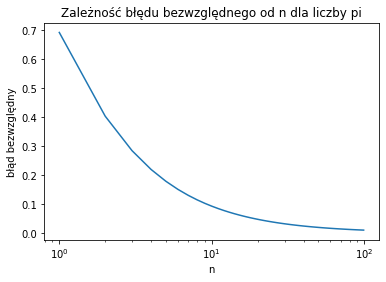

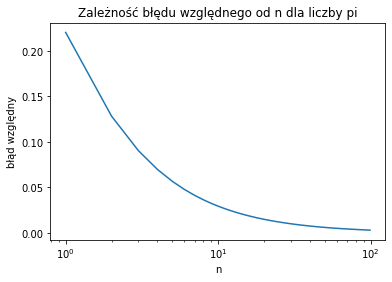

In [6]:
n = np.arange(1, 100, 1)
abs_result = []
rel_result = []

for elem in n:
    elem = int(elem)
    abs_result.append(main.absolut_error(np.pi, main.pi(elem)))
    rel_result.append(main.relative_error(np.pi, main.pi(elem)))

plt.semilogx(n, abs_result)
plt.xlabel('n')
plt.ylabel('błąd bezwzględny')
plt.title('Zależność błędu bezwzględnego od n dla liczby pi')
plt.show()

plt.semilogx(n, rel_result)
plt.xlabel('n')
plt.ylabel('błąd względny')
plt.title('Zależność błędu względnego od n dla liczby pi')
plt.show()

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

The slowest run took 4.67 times longer than the fastest. This could mean that an intermediate result is being cached.
2.79 µs ± 696 ns per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
The slowest run took 11.28 times longer than the fastest. This could mean that an intermediate result is being cached.
3.59 µs ± 2.45 µs per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
The slowest run took 12.65 times longer than the fastest. This could mean that an intermediate result is being cached.
3.95 µs ± 2.01 µs per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
The slowest run took 4.73 times longer than the fastest. This could mean that an intermediate result is being cached.
4.44 µs ± 1.31 µs per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
4.4 µs ± 861 ns per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
4.62 µs ± 430 ns per loop (mean ± std. dev. of 1000 runs, 10000 loops each)
4.96 µs ± 450 ns per loop (mean ± std. dev. of 1000 runs, 10000 loop

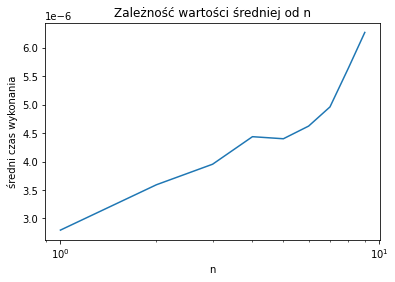

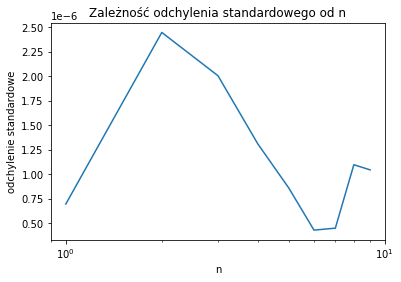

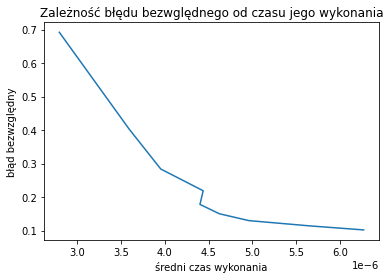

In [9]:
n = np.arange(1, 10, 1)
timeit_average = []
timeit_st_dev = []
abs_result = []

for elem in n:
    elem = int(elem)
    saved_timing = %timeit -r 1000 -n 10000 -o main.pi(elem)
    timeit_average.append(saved_timing.average)
    timeit_st_dev.append(saved_timing.stdev)
    abs_result.append(main.absolut_error(np.pi, main.pi(elem)))

plt.errorbar(n, timeit_average)
plt.title('Zależność wartości średniej od n')
plt.xlabel('n')
plt.ylabel('średni czas wykonania')
plt.xscale('log')
plt.show()

plt.errorbar(n, timeit_st_dev)
plt.title('Zależność odchylenia standardowego od n')
plt.xlabel('n')
plt.ylabel('odchylenie standardowe')
plt.xscale('log')
plt.show()

plt.plot(timeit_average, abs_result)
plt.title('Zależność błędu bezwględnego od czasu jego wykonania')
plt.xlabel('średni czas wykonania')
plt.ylabel('błąd bezwzględny')
plt.show()

Zapoznałem się z różnymi rodzajami błędów numerycznych. Wiem kiedy występują i w jaki sposób można zmniejszać powstałe błędy względne i bezwzględne (poprzez wykonywanie obliczeń z większą dokładnością). Utrwaliłem wiedzę związaną z tworzeniem wykresów w Pythonie za pośrednictwem biblioteki matplotlib. Poznałem również moduł memory_profiler, który udostępnia nam funkcję timeit służącą do przeprowadzania statystyk odnośnie długości czasowej obliczeń.